<a href="https://colab.research.google.com/github/2003nahid/ML-Projects/blob/main/Fake_NewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Printing the stopwords in english
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Pre-Processing


In [ ]:
# Loading a dataset to a pandas DataFrame
true = pd.read_csv('True.csv')
false = pd.read_csv('Fake.csv')

In [ ]:
true['label'] = 1
false['label'] = 0

In [ ]:
news = pd.concat([true, false], axis = 0)

In [ ]:
#First 5 rows of the dataFrame
news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
#Last 5 rows of the dataFrame
news.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
#Counting the number of missing values in the dataset
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [ ]:
news = news.drop(['subject', 'date'], axis = 1)

In [ ]:
news['content'] = news['title']

In [ ]:
#Separating data & labels
X = news.drop(columns = 'label', axis = 1)
Y = news['label']

In [ ]:
print(X)
print(Y)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  \
0      WASHINGTON (Reuters) - The head of a conservat...   
1      WASHINGTON (Reuters) - Transgender people will...   
2      WASHINGTON (Reuters) - The special counsel inv...   
3      WASHINGTON (Reuters) - Trump cam

In [ ]:
news = news.sample(frac = 1)

In [ ]:
news.head()


,title,text,label,content
10097,Hillary Clinton to propose $10 billion manufac...,WASHINGTON (Reuters) - Democratic presidential...,1,Hillary Clinton to propose $10 billion manufac...
18954,Singaporean blogger released after winning U.S...,CHICAGO (Reuters) - A young Singaporean blogge...,1,Singaporean blogger released after winning U.S...
8451,GOP Leader Admits Benghazi Was Used In Plot T...,Benghazi was just a ploy to hurt Hillary Clint...,0,GOP Leader Admits Benghazi Was Used In Plot T...
18744,Militants attack Kabul airport during Mattis v...,KABUL (Reuters) - (This September 27th story h...,1,Militants attack Kabul airport during Mattis v...
9401,WHOA! Is RINO Senator Mitch McConnell Behind R...,From the Washington Examiner Roy Moore is th...,0,WHOA! Is RINO Senator Mitch McConnell Behind R...


In [ ]:
news.tail()

,title,text,label,content
18746,WHAT IS BLACK PRIVILEGE? [Video],Black privilege is being able to take pride i...,0,WHAT IS BLACK PRIVILEGE? [Video]
13131,OCTOBER 1st Could Mark End Of Free Speech On T...,Anyone who s paying attention to the stunning ...,0,OCTOBER 1st Could Mark End Of Free Speech On T...
15857,Libya considering UK extradition request for M...,TRIPOLI (Reuters) - Libyan authorities are pro...,1,Libya considering UK extradition request for M...
10601,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,0,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...
15621,WHY TAXPAYER FUNDED FOOD TRUCKS PLAN TO STALK ...,I wonder how many government funded trucks wil...,0,WHY TAXPAYER FUNDED FOOD TRUCKS PLAN TO STALK ...


In [ ]:
news.reset_index(inplace = True)

In [ ]:
news.head()

,index,title,text,label,content
0,10097,Hillary Clinton to propose $10 billion manufac...,WASHINGTON (Reuters) - Democratic presidential...,1,Hillary Clinton to propose $10 billion manufac...
1,18954,Singaporean blogger released after winning U.S...,CHICAGO (Reuters) - A young Singaporean blogge...,1,Singaporean blogger released after winning U.S...
2,8451,GOP Leader Admits Benghazi Was Used In Plot T...,Benghazi was just a ploy to hurt Hillary Clint...,0,GOP Leader Admits Benghazi Was Used In Plot T...
3,18744,Militants attack Kabul airport during Mattis v...,KABUL (Reuters) - (This September 27th story h...,1,Militants attack Kabul airport during Mattis v...
4,9401,WHOA! Is RINO Senator Mitch McConnell Behind R...,From the Washington Examiner Roy Moore is th...,0,WHOA! Is RINO Senator Mitch McConnell Behind R...


In [ ]:
news = news.drop(['index'], axis = 1)

In [ ]:
news.head()

,title,text,label,content
0,Hillary Clinton to propose $10 billion manufac...,WASHINGTON (Reuters) - Democratic presidential...,1,Hillary Clinton to propose $10 billion manufac...
1,Singaporean blogger released after winning U.S...,CHICAGO (Reuters) - A young Singaporean blogge...,1,Singaporean blogger released after winning U.S...
2,GOP Leader Admits Benghazi Was Used In Plot T...,Benghazi was just a ploy to hurt Hillary Clint...,0,GOP Leader Admits Benghazi Was Used In Plot T...
3,Militants attack Kabul airport during Mattis v...,KABUL (Reuters) - (This September 27th story h...,1,Militants attack Kabul airport during Mattis v...
4,WHOA! Is RINO Senator Mitch McConnell Behind R...,From the Washington Examiner Roy Moore is th...,0,WHOA! Is RINO Senator Mitch McConnell Behind R...


In [ ]:
news.tail()

,title,text,label,content
44893,WHAT IS BLACK PRIVILEGE? [Video],Black privilege is being able to take pride i...,0,WHAT IS BLACK PRIVILEGE? [Video]
44894,OCTOBER 1st Could Mark End Of Free Speech On T...,Anyone who s paying attention to the stunning ...,0,OCTOBER 1st Could Mark End Of Free Speech On T...
44895,Libya considering UK extradition request for M...,TRIPOLI (Reuters) - Libyan authorities are pro...,1,Libya considering UK extradition request for M...
44896,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...,CNN political hack Alison Camarota wants to na...,0,LEFTY MEDIA DESPERATELY Tries To Bury Trump Bu...
44897,WHY TAXPAYER FUNDED FOOD TRUCKS PLAN TO STALK ...,I wonder how many government funded trucks wil...,0,WHY TAXPAYER FUNDED FOOD TRUCKS PLAN TO STALK ...


In [ ]:
print(X)

                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text  \
0      WASHINGTON (Reuters) - The head of a conservat...   
1      WASHINGTON (Reuters) - Transgender people will...   
2      WASHINGTON (Reuters) - The special counsel inv...   
3      WASHINGTON (Reuters) - Trump cam

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content
#

In [ ]:
news['content'] =news['content'].apply(stemming)

In [ ]:
print (news['content'])

0         hillari clinton propos billion manufactur invest
1             singaporean blogger releas win u rule asylum
2        gop leader admit benghazi use plot get hillari...
3        milit attack kabul airport matti visit u strik...
4        whoa rino senat mitch mcconnel behind roy moor...
                               ...                        
44893                                 black privileg video
44894    octob st could mark end free speech internet o...
44895    libya consid uk extradit request manchest bomb...
44896    lefti media desper tri buri trump brilliant ke...
44897         taxpay fund food truck plan stalk kid summer
Name: content, Length: 44898, dtype: object


In [ ]:
display(news['content'])

,content
0,hillari clinton propos billion manufactur invest
1,singaporean blogger releas win u rule asylum
2,gop leader admit benghazi use plot get hillari...
3,milit attack kabul airport matti visit u strik...
4,whoa rino senat mitch mcconnel behind roy moor...
...,...
44893,black privileg video
44894,octob st could mark end free speech internet o...
44895,libya consid uk extradit request manchest bomb...
44896,lefti media desper tri buri trump brilliant ke...


In [ ]:
#Separating the data and label
X = news['content'].values
Y = news['label'].values

In [ ]:
print(X)

['hillari clinton propos billion manufactur invest'
 'singaporean blogger releas win u rule asylum'
 'gop leader admit benghazi use plot get hillari audio' ...
 'libya consid uk extradit request manchest bomber brother'
 'lefti media desper tri buri trump brilliant ken starr buy video'
 'taxpay fund food truck plan stalk kid summer']


In [ ]:
print(Y)

[1 1 0 ... 1 0 0]


In [ ]:
Y.shape

(44898,)

In [ ]:
#Converting textual data into numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 411810 stored elements and shape (44898, 13206)>
  Coords	Values
  (0, 1130)	0.40210428398005243
  (0, 2190)	0.27183746382404356
  (0, 5437)	0.2578613559994037
  (0, 5988)	0.49486801626195276
  (0, 7081)	0.5341693106898929
  (0, 9107)	0.4095031784330791
  (1, 648)	0.40981113420922677
  (1, 1242)	0.4742652111835083
  (1, 9575)	0.3077409814385626
  (1, 9973)	0.2912226631431877
  (1, 10605)	0.5838727097193082
  (1, 12943)	0.2944568752793208
  (2, 129)	0.3593336231814508
  (2, 685)	0.3935552046174381
  (2, 1050)	0.3882396423316461
  (2, 4778)	0.2652006913548297
  (2, 4916)	0.2902470352174562
  (2, 5437)	0.23104625131911566
  (2, 6602)	0.2893925792945918
  (2, 8806)	0.427539343699942
  (2, 12463)	0.301278201225446
  (3, 230)	0.3505233215482436
  (3, 667)	0.23253219238043732
  (3, 2120)	0.38507295919105117
  (3, 5463)	0.29589960193188225
  :	:
  (44895, 2452)	0.3118938335287815
  (44895, 4057)	0.4019673802484673
  (44895, 6719)	0.

Splitting the dataset to train and test data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

Training the model:Logistic Regression

In [ ]:
model_LR = LogisticRegression()

In [ ]:
model_LR.fit(X_train, Y_train)

LogisticRegression()

Evaluating the accuracy score

In [ ]:
#Accuracy score on test data although we can find for train data also but as we build the model on train data it will give a high accuracy but to check how well the model works we used test dat for accuracy score
X_test_prediction = model_LR.predict(X_test)
LR_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy of Logistic Regression: ", LR_accuracy)

Accuracy of Logistic Regression:  0.9459910913140311


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4696
           1       0.94      0.95      0.94      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

Confusion Matrix:
[[4427  269]
 [ 216 4068]]


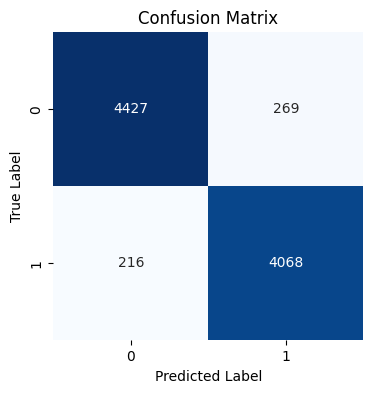

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Training the model for Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier()

In [ ]:
model_RF.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
X_RF_predict = model_RF.predict(X_test)
RF_accuracy = accuracy_score(X_RF_predict, Y_test)

In [ ]:
print("Accuracy of Random Forest: ", RF_accuracy)

Accuracy of Random Forest:  0.9473273942093541


In [ ]:
print("Classification Report:")
print(classification_report(Y_test, X_RF_predict))

print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_RF_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4696
           1       0.94      0.95      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

Confusion Matrix:
[[4442  254]
 [ 219 4065]]


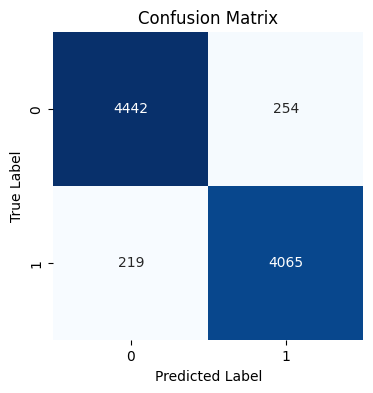

In [ ]:
cm = confusion_matrix(Y_test, X_RF_predict)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier()

In [ ]:
model_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
X_DT_predict = model_DT.predict(X_test)
DT_accuracy = accuracy_score(X_DT_predict, Y_test)

In [ ]:
print("Accuracy of Decision Tree: ", DT_accuracy)

Accuracy of Decision Tree:  0.9074610244988864


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier()

In [ ]:
model_GB.fit(X_train, Y_train)

GradientBoostingClassifier()

In [ ]:
X_GB_predict = model_GB.predict(X_test)
GB_accuracy = accuracy_score(X_GB_predict, Y_test)

In [ ]:
print("Accuracy of gradient boosting: ", GB_accuracy)

Accuracy of gradient boosting:  0.8562360801781738


Making a predictive system


In [ ]:
def output_lable(n):
  if n == 0:
    return "It is a Fake News"
  elif n == 1:
    return "It is a Genuine News"

In [ ]:
def manual_testing(news):
  testing_news = {"content":[news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["content"] = new_def_test["content"].apply(stemming)
  new_x_test = new_def_test["content"]
  new_xv_test = vectorizer.transform(new_x_test)
  pred_LR = model_LR.predict(new_xv_test)
  pred_DT = model_DT.predict(new_xv_test)
  pred_RF = model_RF.predict(new_xv_test)
  pred_GB = model_GB.predict(new_xv_test)
  return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nGBC Prediction: {} \n".format(output_lable(pred_LR), output_lable(pred_DT), output_lable(pred_RF), output_lable(pred_GB)))

In [ ]:
news_article = str(input())

Trump on Twitter (Dec 27) - Trump, Iraq, Syria


In [ ]:
manual_testing(news_article)



LR Prediction: It is a Genuine News 
DT Prediction: It is a Genuine News 
RFC Prediction: It is a Genuine News 
GBC Prediction: It is a Genuine News 

